Name: Saurabh Arun Yadgire USC ID: 8065527198 Github ID:yadgire7

Resources:
1. https://www.youtube.com/watch?v=Zcjl8xPLmPw
2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.predict
3. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
5. https://towardsdatascience.com/unsupervised-learning-k-means-clustering-6fd72393573c
6. https://towardsdatascience.com/machine-learning-vi-unsupervised-learning-k-means-kaggle-dataset-with-k-means-1adf5c30281b
7. https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
8. https://mathworld.wolfram.com/FrobeniusNorm.html
9. https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.softmax.html
10. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
11. https://towardsdatascience.com/spectral-clustering-aba2640c0d5b
12. 

In [93]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import auc,confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix,plot_roc_curve,roc_auc_score,roc_curve,f1_score,accuracy_score,precision_score,recall_score,classification_report,mean_squared_error
from sklearn.svm import LinearSVC,SVC
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
import warnings
from scipy.special import softmax

## Q.1.a.

In [2]:
data = pd.read_csv(r'../Data/wdbc.csv')
data.columns = range(data.shape[1])
data =data.iloc[:,1:]
data.columns = range(data.shape[1])
# x = data.iloc[:,1:]
# y = data.loc[:,0]
string = 'feature'
col_arr = []
for i in range(1,31):
    col_arr.append(string+str(i))
col_arr.insert(0,'class')
# col_arr
data.columns=col_arr
data

,class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data['class'].value_counts()

B    357
M    211
Name: class, dtype: int64

In [4]:
for i in range(0,data.shape[0]):
    if data.iat[i,0] =='M':
        data.iat[i,0]=int(1)
    else:
        data.iat[i,0]=int(0)
data


,class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# creating stratified train and test data with 20% observations from each set
test_size = 0.2   #20% of each class to be used as test data
neg,pos=data['class'].value_counts()
pos_num = round(pos*test_size)
neg_num = round(neg*test_size)
pos_class, = np.where(data['class']==1)
neg_class,= np.where(data['class']==0)
pos_test = np.random.choice(pos_class,pos_num,replace=False)
neg_test = np.random.choice(neg_class,neg_num,replace=False)
test_index = np.concatenate([pos_test,neg_test])
# print(pos_num,neg_num)
train_index = [i for i in range(0,data.shape[0]) if i not in test_index]
# print(train_index)
train = data.iloc[train_index,:]
test = data.loc[test_index,:]
train_x = train.iloc[:,1:]
train_y = train.loc[:,'class']
train_y=train_y.astype('int')
test_x = test.iloc[:,1:]
test_y = test.loc[:,'class']
test_y=test_y.astype('int')
print(pos_num)

42


In [6]:
print(train)

    class  feature1  feature2  feature3  feature4  feature5  feature6  \
1       1     19.69     21.25    130.00    1203.0   0.10960    0.1599   
2       1     11.42     20.38     77.58     386.1   0.14250    0.2839   
4       1     12.45     15.70     82.57     477.1   0.12780    0.1700   
5       1     18.25     19.98    119.60    1040.0   0.09463    0.1090   
6       1     13.71     20.83     90.20     577.9   0.11890    0.1645   
..    ...       ...       ...       ...       ...       ...       ...   
562     1     20.92     25.09    143.00    1347.0   0.10990    0.2236   
563     1     21.56     22.39    142.00    1479.0   0.11100    0.1159   
564     1     20.13     28.25    131.20    1261.0   0.09780    0.1034   
565     1     16.60     28.08    108.30     858.1   0.08455    0.1023   
566     1     20.60     29.33    140.10    1265.0   0.11780    0.2770   

     feature7  feature8  feature9  ...  feature21  feature22  feature23  \
1     0.19740   0.12790    0.2069  ...      23.5

## Q.a.b.i

In [7]:
def get_metrics(y_true,y_pred):
    class_report = classification_report(y_true,y_pred,output_dict=True)
    return {
        "Accuracy_score": class_report['accuracy'],
        "Precision_score": precision_score(y_true,y_pred),
        "Recall_score": recall_score(y_true,y_pred),
        "f1_score": f1_score(y_true,y_pred),
        "AUC": roc_auc_score(y_true,y_pred)
    }

The train report for pass 1 is: 
{'Accuracy_score': 0.9340659340659341, 'Precision_score': 0.9426751592356688, 'Recall_score': 0.8757396449704142, 'f1_score': 0.9079754601226994, 'AUC': 0.9221355567509414}

The test report for pass 1 is: 
{'Accuracy_score': 0.9203539823008849, 'Precision_score': 0.8837209302325582, 'Recall_score': 0.9047619047619048, 'f1_score': 0.8941176470588236, 'AUC': 0.9171696847753185}

The best parameter is:
{'C': 10.0}

............................

The train report for pass 2 is: 
{'Accuracy_score': 0.9340659340659341, 'Precision_score': 0.9426751592356688, 'Recall_score': 0.8757396449704142, 'f1_score': 0.9079754601226994, 'AUC': 0.9221355567509414}

The test report for pass 2 is: 
{'Accuracy_score': 0.9203539823008849, 'Precision_score': 0.8837209302325582, 'Recall_score': 0.9047619047619048, 'f1_score': 0.8941176470588236, 'AUC': 0.9171696847753185}

The best parameter is:
{'C': 10.0}

............................

The train report for pass 3 is: 
{'Accurac

The train report for pass 19 is: 
{'Accuracy_score': 0.9340659340659341, 'Precision_score': 0.9426751592356688, 'Recall_score': 0.8757396449704142, 'f1_score': 0.9079754601226994, 'AUC': 0.9221355567509414}

The test report for pass 19 is: 
{'Accuracy_score': 0.9203539823008849, 'Precision_score': 0.8837209302325582, 'Recall_score': 0.9047619047619048, 'f1_score': 0.8941176470588236, 'AUC': 0.9171696847753185}

The best parameter is:
{'C': 10.0}

............................

The train report for pass 20 is: 
{'Accuracy_score': 0.9340659340659341, 'Precision_score': 0.9426751592356688, 'Recall_score': 0.8757396449704142, 'f1_score': 0.9079754601226994, 'AUC': 0.9221355567509414}

The test report for pass 20 is: 
{'Accuracy_score': 0.9203539823008849, 'Precision_score': 0.8837209302325582, 'Recall_score': 0.9047619047619048, 'f1_score': 0.8941176470588236, 'AUC': 0.9171696847753185}

The best parameter is:
{'C': 10.0}

............................

The train report for pass 21 is: 
{'Ac

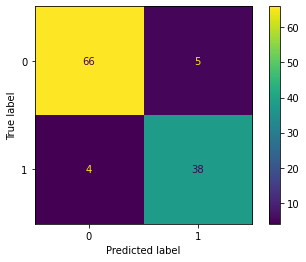

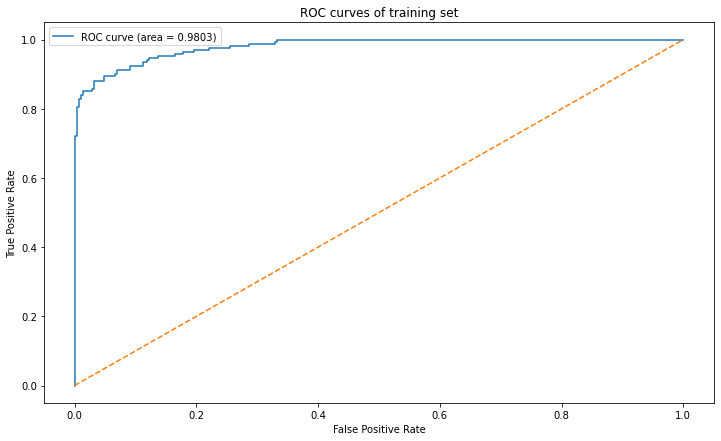

...........................



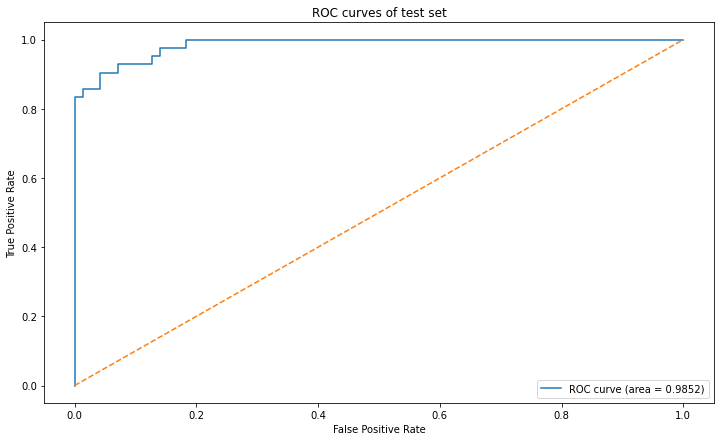

In [8]:
warnings.filterwarnings(action='ignore')
M = int(30)
a = np.arange(-2,2,dtype=float)
c_arr = [10**i for i in a]
c_param ={'C':c_arr}
params = {'param_grid':c_param,'scoring' : 'f1_weighted',
        'n_jobs' : -1,'verbose':0}
scalar = Normalizer()
norm_train_x = scalar.fit_transform(train_x)
norm_test_x = scalar.fit_transform(test_x)
train_summary_df = pd.DataFrame(columns=["Accuracy_score","Precision_score","Recall_score","f1_score","AUC"])
test_summary_df = pd.DataFrame(columns=["Accuracy_score","Precision_score","Recall_score","f1_score","AUC"])
for m in range(1,31):
    params['cv'] = StratifiedKFold(n_splits=5,shuffle=True,random_state=m)
    gs = GridSearchCV(estimator=LinearSVC(penalty='l1',dual=False),**params)
    gs.fit(norm_train_x,train_y)
    train_pred_prob = gs.decision_function(norm_train_x)
    train_pred = gs.predict(norm_train_x)
    test_pred_prob = gs.decision_function(norm_test_x)
    test_pred = gs.predict(norm_test_x)

    train_metrics = get_metrics(train_y,train_pred)
    test_metrics = get_metrics(test_y,test_pred)
    train_summary_df=train_summary_df.append(train_metrics,ignore_index=True)
    test_summary_df=test_summary_df.append(test_metrics,ignore_index=True)
    print(f'The train report for pass {m} is: \n{train_metrics}\n')
#   print(train_metrics)
    print(f'The test report for pass {m} is: \n{test_metrics}\n')
    print(f"The best parameter is:\n{gs.best_params_}\n")
    print("............................\n")
    
print(f"The confusion matrix, roc_curve for m=7 are:\n")
cm=confusion_matrix(test_y,test_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
print("...........................\n")
fpr, tpr, thresholds = roc_curve(train_y, train_pred_prob, pos_label=1)
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of training set")
plt.show()
print("...........................\n")
fpr, tpr, thresholds = roc_curve(test_y, test_pred_prob, pos_label=1)
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of test set")
plt.show()



In [9]:
print(f"Average Metrics for training set:\n{train_summary_df.mean()}")
print(f"Average Metrics for test set:\n{test_summary_df.mean()}")

Average Metrics for training set:
Accuracy_score     0.932308
Precision_score    0.941604
Recall_score       0.871795
f1_score           0.905337
AUC                0.919930
dtype: float64
Average Metrics for test set:
Accuracy_score     0.920354
Precision_score    0.883721
Recall_score       0.904762
f1_score           0.894118
AUC                0.917170
dtype: float64


## Q.2.b.ii

In [25]:
# print(train.index)
# print(train)
neg,pos = train['class'].value_counts()
pos_class, = np.where(train['class']==1)
# print(pos_class)
# print(len(pos_class))
neg_class,= np.where(train['class']==0)
# print(neg_class)
# print(len(pos_class)+len(neg_class))
pos_num = round(pos*0.5)
# print(pos_num)
neg_num = round(neg*0.5)
# print(pos_num+neg_num)
labeled_train_pos = np.random.choice(pos_class,pos_num,replace=False)
labeled_train_neg = np.random.choice(neg_class,neg_num,replace=False)
labeled_train_index = np.concatenate((labeled_train_pos,labeled_train_neg))
# print(labeled_train_index)
unlabeled_train_index = [i for i in range(0,train.shape[0]) if i not in labeled_train_index]
# print(unlabeled_train_index)
labeled = train.iloc[labeled_train_index,:]
unlabeled = train.iloc[unlabeled_train_index,:]
labeled_train_x = labeled.iloc[:,1:]
labeled_train_x=labeled_train_x.to_numpy()
labeled_train_y = labeled.loc[:,'class'].to_numpy()
labeled_train_y = labeled_train_y.astype('int')
unlabeled_train_x = unlabeled.iloc[:,1:]
unlabeled_train_y.to_numpy()
unlabeled_train_y = unlabeled.loc[:,'class'].to_numpy()
unlabeled_train_y = unlabeled_train_y.astype('int')

In [34]:
warnings.filterwarnings(action='ignore')
M = int(30)
a = np.arange(-2,2,dtype=float)
c_arr = [10**i for i in a]
c_param ={'C':c_arr}
params = {'param_grid':c_param,'scoring' : 'f1_weighted',
        'n_jobs' : -1,'verbose':0}
scalar = Normalizer()
norm_train_x = scalar.fit_transform(train_x)
norm_test_x = scalar.fit_transform(test_x)
train_summary_df = pd.DataFrame(columns=["Accuracy_score","Precision_score","Recall_score","f1_score","AUC"])
test_summary_df = pd.DataFrame(columns=["Accuracy_score","Precision_score","Recall_score","f1_score","AUC"])
for m in range(1,31):
    params['cv'] = StratifiedKFold(n_splits=5,shuffle=True,random_state=m)
    gs = GridSearchCV(estimator=LinearSVC(penalty='l1',dual=False),**params)
    gs.fit(labeled_train_x,labeled_train_y)
    while(len(unlabeled_train_x)>0):
        score = gs.decision_function(unlabeled_train_x)
        sort_index =sorted(range(len(score)),key=score.__getitem__)
#         print(sort_index)

        unlabeled_train_x = [unlabeled_train_x[i] for i in sort_index]
        unlabeled_train_y = [unlabeled_train_y[i] for i in sort_index] 
        labeled_train_x.append(unlabeled_train_x.pop())
        labeled_train_y.append(unlabeled_train_y.pop())
        gs = gs.best_estimator_.fit(labeled_train_x,labeled_train_y)
    train_pred_prob = gs.decision_function(norm_train_x)
    train_pred = gs.predict(norm_train_x)
    test_pred_prob = gs.decision_function(norm_test_x)
    test_pred = gs.predict(norm_test_x)

    train_metrics = get_metrics(train_y,train_pred)
    test_metrics = get_metrics(test_y,test_pred)
    train_summary_df=train_summary_df.append(train_metrics,ignore_index=True)
    test_summary_df=test_summary_df.append(test_metrics,ignore_index=True)
    print(f'The train report for pass {m} is: \n{train_metrics}\n')
#   print(train_metrics)
    print(f'The test report for pass {m} is: \n{test_metrics}\n')
    print(f"The best parameter is:\n{gs.best_params_}\n")
    print("............................\n")

[70, 15, 222, 114, 62, 195, 208, 42, 16, 63, 185, 33, 120, 155, 124, 215, 66, 117, 160, 69, 132, 123, 119, 28, 50, 130, 85, 204, 126, 152, 166, 39, 115, 95, 26, 111, 48, 108, 19, 154, 40, 105, 97, 89, 121, 220, 64, 56, 133, 202, 157, 172, 136, 104, 129, 186, 122, 118, 25, 189, 68, 175, 99, 149, 209, 20, 162, 135, 168, 158, 140, 201, 134, 60, 139, 34, 54, 151, 180, 113, 87, 53, 169, 127, 107, 44, 188, 196, 165, 181, 187, 219, 138, 98, 156, 80, 207, 167, 191, 221, 159, 145, 214, 174, 37, 96, 112, 179, 190, 57, 84, 177, 210, 88, 91, 147, 148, 218, 198, 178, 30, 211, 41, 170, 52, 161, 36, 92, 146, 150, 7, 141, 55, 82, 192, 206, 116, 197, 217, 31, 194, 183, 193, 73, 77, 79, 213, 182, 164, 131, 106, 216, 17, 153, 51, 78, 67, 65, 8, 83, 171, 93, 110, 144, 226, 2, 203, 46, 1, 35, 74, 32, 4, 5, 61, 176, 102, 22, 137, 49, 23, 163, 90, 27, 173, 47, 58, 14, 24, 9, 223, 72, 212, 12, 125, 205, 6, 103, 184, 199, 43, 13, 29, 109, 3, 10, 71, 101, 200, 0, 75, 94, 18, 76, 224, 100, 45, 225, 86, 227, 128,

KeyError: 70

In [ ]:
# print(labeled_train_x)

The main drawback of unsupervised K-means clustering is the inistialization. Different starting centers give different classification results. The local minimum problem can be overcome by fixing the number of iterations (say 100), choosing a different center in each iteration. Finally choose the set of parameters which give the sallest value for cost function.

In [36]:
train

,class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
1,1,19.69,21.25,130.00,1203.0,0.10960,0.1599,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,12.45,15.70,82.57,477.1,0.12780,0.1700,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
5,1,18.25,19.98,119.60,1040.0,0.09463,0.1090,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
6,1,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,1,20.92,25.09,143.00,1347.0,0.10990,0.2236,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
563,1,21.56,22.39,142.00,1479.0,0.11100,0.1159,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
564,1,20.13,28.25,131.20,1261.0,0.09780,0.1034,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
565,1,16.60,28.08,108.30,858.1,0.08455,0.1023,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [37]:
test

,class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
196,1,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.253500,0.091810,0.2369,0.06558
44,1,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.197400,0.100900,0.1907,...,22.82,21.32,150.60,1567.0,0.16790,0.50900,0.734500,0.237800,0.3799,0.09185
171,1,15.46,11.89,102.50,736.9,0.12570,0.15550,0.203200,0.109700,0.1966,...,18.79,17.04,125.00,1102.0,0.15310,0.35830,0.583000,0.182700,0.3216,0.10100
209,1,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.164000,0.095610,0.1765,...,23.24,27.84,158.30,1656.0,0.11780,0.29200,0.386100,0.192000,0.2909,0.05865
126,1,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.092710,0.056270,0.1946,...,22.32,25.73,148.20,1538.0,0.10210,0.22640,0.320700,0.121800,0.2841,0.06541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,0,13.66,15.15,88.27,580.6,0.08268,0.07548,0.042490,0.024710,0.1792,...,14.54,19.64,97.96,657.0,0.12750,0.31040,0.256900,0.105400,0.3387,0.09638
177,0,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
470,0,12.04,28.14,76.85,449.9,0.08752,0.06000,0.023670,0.023770,0.1854,...,13.60,33.33,87.24,567.6,0.10410,0.09726,0.055240,0.055470,0.2404,0.06639
512,0,14.58,13.66,94.29,658.8,0.09832,0.08918,0.082220,0.043490,0.1739,...,16.76,17.24,108.50,862.0,0.12230,0.19280,0.249200,0.091860,0.2626,0.07048


## Q.1.b.iii

In [52]:
def calculateDistance(centers, data, predlabels):    # function to calculate distance from the chosen centers to get the global optimum
    dist = np.ndarray((data.shape[0]))   #array to store distances from centroids 
    probability = np.ndarray((data.shape[0],2))    # 2 bcz k=2 so kmeans will return array of 2 centers
    
    for i , x in enumerate(data):
        center = centers[predlabels[i]]
        dist[i] = np.linalg.norm(x-center)   #this will calculate the frobenius norm of the vector i.e. sq.root of sum of squares of the elements of the vector
        probability[i,0] = np.linalg.norm(x - centers[0])   # dist from pos. class
    #     NOTE:in Kmeans 0= pos class ans 1= neg class
        probability[i,1] = np.linalg.norm(x-centers[1])
    # using softmax function
    soft_prob = softmax(probability,axis=1)  # axis = 1 bcz we need classwise softmax value
    return dist,soft_prob

In [53]:
def majorCluster(data, pred_label, dist, actual_label):
    label2cluster = np.ndarray((2,), dtype='int')
    major_label = pred_label.copy()
    for cluster in [0, 1]:
        sample_idx, = np.where(pred_label == cluster)
        top30 = sorted(sample_idx.tolist(), key=lambda i : dist[i])[:30]
        majority = actual_label.iloc[top30].value_counts().index[0]
        major_label[sample_idx] = majority
        label2cluster[majority] = cluster
    return label2cluster, major_label

The train report for pass 1 is: 
{'Accuracy_score': 0.8769230769230769, 'Precision_score': 0.9747899159663865, 'Recall_score': 0.6863905325443787, 'f1_score': 0.8055555555555555, 'AUC': 0.8379505110274341}

The test report for pass 1 is: 
{'Accuracy_score': 0.8938053097345132, 'Precision_score': 0.9166666666666666, 'Recall_score': 0.7857142857142857, 'f1_score': 0.8461538461538461, 'AUC': 0.8717303822937625}

The train report for pass 2 is: 
{'Accuracy_score': 0.8769230769230769, 'Precision_score': 0.9747899159663865, 'Recall_score': 0.6863905325443787, 'f1_score': 0.8055555555555555, 'AUC': 0.8379505110274341}

The test report for pass 2 is: 
{'Accuracy_score': 0.8938053097345132, 'Precision_score': 0.9166666666666666, 'Recall_score': 0.7857142857142857, 'f1_score': 0.8461538461538461, 'AUC': 0.8717303822937625}

The train report for pass 3 is: 
{'Accuracy_score': 0.8769230769230769, 'Precision_score': 0.9747899159663865, 'Recall_score': 0.6863905325443787, 'f1_score': 0.8055555555555

The train report for pass 21 is: 
{'Accuracy_score': 0.8769230769230769, 'Precision_score': 0.9747899159663865, 'Recall_score': 0.6863905325443787, 'f1_score': 0.8055555555555555, 'AUC': 0.8379505110274341}

The test report for pass 21 is: 
{'Accuracy_score': 0.8938053097345132, 'Precision_score': 0.9166666666666666, 'Recall_score': 0.7857142857142857, 'f1_score': 0.8461538461538461, 'AUC': 0.8717303822937625}

The train report for pass 22 is: 
{'Accuracy_score': 0.8769230769230769, 'Precision_score': 0.9747899159663865, 'Recall_score': 0.6863905325443787, 'f1_score': 0.8055555555555555, 'AUC': 0.8379505110274341}

The test report for pass 22 is: 
{'Accuracy_score': 0.8938053097345132, 'Precision_score': 0.9166666666666666, 'Recall_score': 0.7857142857142857, 'f1_score': 0.8461538461538461, 'AUC': 0.8717303822937625}

The train report for pass 23 is: 
{'Accuracy_score': 0.8769230769230769, 'Precision_score': 0.9747899159663865, 'Recall_score': 0.6863905325443787, 'f1_score': 0.80555555

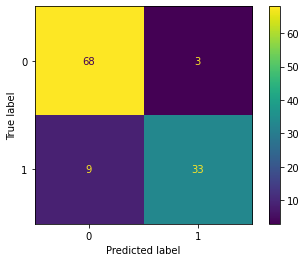

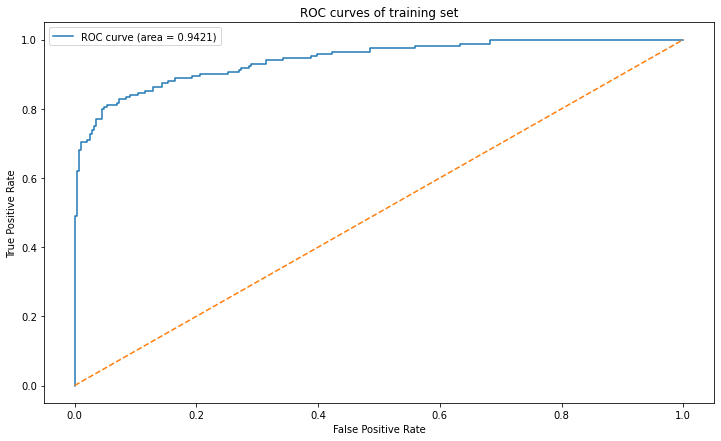

...........................



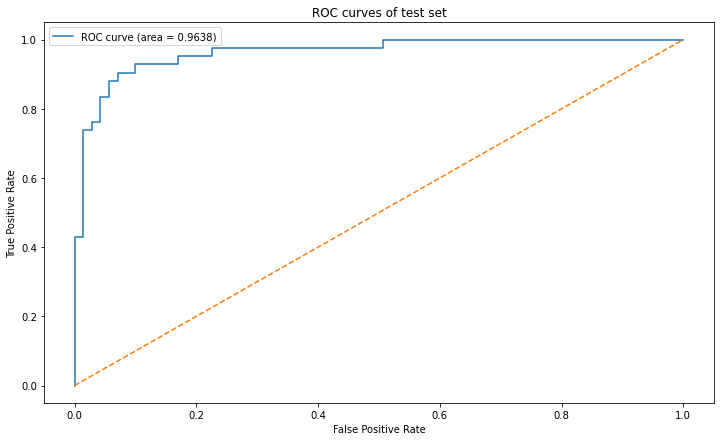

Average Metrics for training set:
Accuracy_score     0.876923
Precision_score    0.974790
Recall_score       0.686391
f1_score           0.805556
AUC                0.837951
dtype: float64
Average Metrics for test set:
Accuracy_score     0.893805
Precision_score    0.916667
Recall_score       0.785714
f1_score           0.846154
AUC                0.871730
dtype: float64


In [59]:
for i in range(1,31):
    scalar = Normalizer()
    norm_train_x = scalar.fit_transform(train_x)
    norm_test_x = scalar.fit_transform(test_x)
    train_summary_df = pd.DataFrame(columns=["Accuracy_score","Precision_score","Recall_score","f1_score","AUC"])
    test_summary_df = pd.DataFrame(columns=["Accuracy_score","Precision_score","Recall_score","f1_score","AUC"])
    kmeans = KMeans(n_clusters=2,random_state=1).fit(norm_train_x)
    
    train_pred_kmeans = kmeans.predict(norm_train_x)
    
    centers = kmeans.cluster_centers_
    dist,train_pred_prob = calculateDistance(centers,norm_train_x,train_pred_kmeans)
    label2cluster, train_pred_kmeans_final = majorCluster(norm_train_x,train_pred_kmeans,dist,train_y)
    positive = label2cluster[0]
    train_pred_prob = train_pred_prob[:,positive]
    train_report = get_metrics(train_y,train_pred_kmeans_final)
    train_summary_df=train_summary_df.append(train_report,ignore_index=True)
    
    test_pred_kmeans = kmeans.predict(norm_test_x)
    dist,test_pred_prob = calculateDistance(centers,norm_test_x,test_pred_kmeans)
    label2cluster, test_pred_kmeans_final = majorCluster(norm_test_x,test_pred_kmeans,dist,test_y)
    positive = label2cluster[0]
    test_pred_prob = test_pred_prob[:,positive]
    test_report = get_metrics(test_y,test_pred_kmeans_final)
    test_summary_df=test_summary_df.append(test_report,ignore_index=True)
    print(f'The train report for pass {i} is: \n{train_report}\n')
#   print(train_metrics)
    print(f'The test report for pass {i} is: \n{test_report}\n')
    
print(f"The confusion matrix, roc_curve for m=7 are:\n")
cm=confusion_matrix(test_y,test_pred_kmeans_final)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
print("...........................\n")
fpr, tpr, thresholds = roc_curve(train_y, train_pred_prob, pos_label=1)
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of training set")
plt.show()
print("...........................\n")
fpr, tpr, thresholds = roc_curve(test_y, test_pred_prob, pos_label=1)
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of test set")
plt.show()
print(f"Average Metrics for training set:\n{train_summary_df.mean()}")
print(f"Average Metrics for test set:\n{test_summary_df.mean()}")

## Q1.b.iv

The train report for pass 1 is: 
{'Accuracy_score': 0.8967032967032967, 'Precision_score': 0.9013157894736842, 'Recall_score': 0.8106508875739645, 'f1_score': 0.8535825545171339, 'AUC': 0.879101667563206}

The test report for pass 1 is: 
{'Accuracy_score': 0.8938053097345132, 'Precision_score': 0.9166666666666666, 'Recall_score': 0.7857142857142857, 'f1_score': 0.8461538461538461, 'AUC': 0.8717303822937625}

The train report for pass 2 is: 
{'Accuracy_score': 0.8967032967032967, 'Precision_score': 0.9013157894736842, 'Recall_score': 0.8106508875739645, 'f1_score': 0.8535825545171339, 'AUC': 0.879101667563206}

The test report for pass 2 is: 
{'Accuracy_score': 0.8938053097345132, 'Precision_score': 0.9166666666666666, 'Recall_score': 0.7857142857142857, 'f1_score': 0.8461538461538461, 'AUC': 0.8717303822937625}

The train report for pass 3 is: 
{'Accuracy_score': 0.8967032967032967, 'Precision_score': 0.9013157894736842, 'Recall_score': 0.8106508875739645, 'f1_score': 0.853582554517133

The train report for pass 21 is: 
{'Accuracy_score': 0.8967032967032967, 'Precision_score': 0.9013157894736842, 'Recall_score': 0.8106508875739645, 'f1_score': 0.8535825545171339, 'AUC': 0.879101667563206}

The test report for pass 21 is: 
{'Accuracy_score': 0.8938053097345132, 'Precision_score': 0.9166666666666666, 'Recall_score': 0.7857142857142857, 'f1_score': 0.8461538461538461, 'AUC': 0.8717303822937625}

The train report for pass 22 is: 
{'Accuracy_score': 0.8967032967032967, 'Precision_score': 0.9013157894736842, 'Recall_score': 0.8106508875739645, 'f1_score': 0.8535825545171339, 'AUC': 0.879101667563206}

The test report for pass 22 is: 
{'Accuracy_score': 0.8938053097345132, 'Precision_score': 0.9166666666666666, 'Recall_score': 0.7857142857142857, 'f1_score': 0.8461538461538461, 'AUC': 0.8717303822937625}

The train report for pass 23 is: 
{'Accuracy_score': 0.8967032967032967, 'Precision_score': 0.9013157894736842, 'Recall_score': 0.8106508875739645, 'f1_score': 0.8535825545

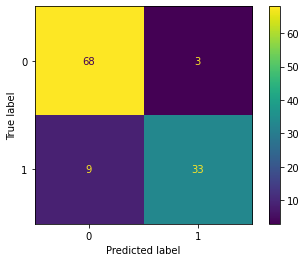

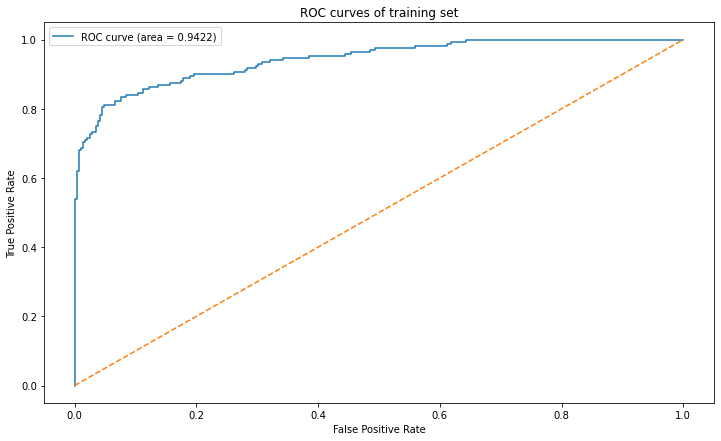

...........................



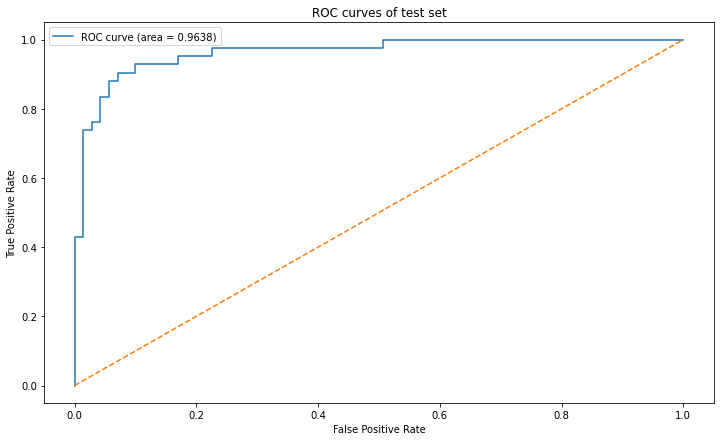

Average Metrics for training set:
Accuracy_score     0.896703
Precision_score    0.901316
Recall_score       0.810651
f1_score           0.853583
AUC                0.879102
dtype: float64
Average Metrics for test set:
Accuracy_score     0.893805
Precision_score    0.916667
Recall_score       0.785714
f1_score           0.846154
AUC                0.871730
dtype: float64


In [62]:
for i in range(1,31):
    scalar = Normalizer()
    norm_train_x = scalar.fit_transform(train_x)
    norm_test_x = scalar.fit_transform(test_x)
    train_summary_df = pd.DataFrame(columns=["Accuracy_score","Precision_score","Recall_score","f1_score","AUC"])
    test_summary_df = pd.DataFrame(columns=["Accuracy_score","Precision_score","Recall_score","f1_score","AUC"])
    
    sc_label = SpectralClustering(n_clusters=2,assign_labels='discretize',random_state=0,affinity='rbf',eigen_tol=1e-2).fit_predict(norm_train_x)
    sc_clusters = []
    
    for c in [0,1]:
        sc_clusters.append(np.mean(norm_train_x[sc_label==c],axis=0).tolist())
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(norm_train_x,sc_label)
    train_sc_label = knn.predict(norm_train_x)

    dist,train_pred_prob = calculateDistance(sc_clusters,norm_train_x,train_sc_label)
    label2cluster, train_sc_label_final = majorCluster(norm_train_x,train_sc_label,dist,train_y)
    positive = label2cluster[0]
    train_pred_prob = train_pred_prob[:,positive]
    train_report = get_metrics(train_y,train_sc_label_final)
    train_summary_df=train_summary_df.append(train_report,ignore_index=True)
    
    test_sc_label = kmeans.predict(norm_test_x)
    dist,test_pred_prob = calculateDistance(centers,norm_test_x,test_sc_label)
    label2cluster, test_sc_label_final = majorCluster(norm_test_x,test_sc_label,dist,test_y)
    positive = label2cluster[0]
    test_pred_prob = test_pred_prob[:,positive]
    test_report = get_metrics(test_y,test_sc_label_final)
    test_summary_df=test_summary_df.append(test_report,ignore_index=True)
    print(f'The train report for pass {i} is: \n{train_report}\n')
#   print(train_metrics)
    print(f'The test report for pass {i} is: \n{test_report}\n')
    
print(f"The confusion matrix, roc_curve for m=7 are:\n")
cm=confusion_matrix(test_y,test_sc_label_final)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
print("...........................\n")
fpr, tpr, thresholds = roc_curve(train_y, train_pred_prob, pos_label=1)
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of training set")
plt.show()
print("...........................\n")
fpr, tpr, thresholds = roc_curve(test_y, test_pred_prob, pos_label=1)
roc_auc = round(auc(fpr, tpr), 4)
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of test set")
plt.show()
print(f"Average Metrics for training set:\n{train_summary_df.mean()}")
print(f"Average Metrics for test set:\n{test_summary_df.mean()}")

### Comparing all the 4 models viz. Supervized, Semi-supervized, Unsupervized, Spectral with unsupervized, we can deduce that the best model is supervized learning model as it has the maximum acccuracy (0.92) for test data among all the models (Which is obvious as the classes are separated wide apart)

## Q.2.a.

In [113]:
df = pd.read_csv(r"../Data/data_banknote_authentication.csv",header=None)
df.columns=['variance','skewness','kurtosis','entropy','class']
df

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [125]:
indices = [i for i in range(0,df.shape[0])]
test_indices = np.random.choice(indices,472,replace=False)
train_indices = [i for i in indices if i not in test_indices]
# train_indices
train_df = df.iloc[train_indices,:]
test_df = df.iloc[test_indices,:]
x_train = train_df.iloc[:,:-1]
y_train=train_df['class']
x_test = test_df.iloc[:,:-1]
y_test = test_df['class']

In [126]:
train_df

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
...,...,...,...,...,...
1363,-1.16670,-1.4237,2.92410,0.66119,1
1364,-2.83910,-6.6300,10.48490,-0.42113,1
1366,-2.41000,3.7433,-0.40215,-1.29530,1
1367,0.40614,1.3492,-1.45010,-0.55949,1


In [127]:
test_df

,variance,skewness,kurtosis,entropy,class
1032,0.16358,-3.35840,1.37490,1.35690,1
1040,1.78750,4.78000,-5.13620,-3.23620,1
410,1.94100,0.46351,4.64720,1.08790,0
359,-2.32420,11.51760,1.82310,-5.37500,0
990,-4.57700,3.45150,0.66719,-0.94742,1
...,...,...,...,...,...
1020,-4.83920,6.67550,-0.24278,-6.57750,1
873,-2.21730,1.46710,-0.72689,-1.17240,1
1345,2.22790,4.09510,-4.80370,-2.11120,1
188,4.56450,-3.62750,2.86840,0.27714,0


## Q.2.b.

In [162]:

def passive_learning(x_train, y_train, x_test, y_test,params):
    to_use=[i for i in range(0,x_train.shape[0])]
    used=[]
    accuracy_array=[]

    while len(to_use)>0:
        np.random.shuffle(to_use)
        pool, to_use = to_use[:10],to_use[10:]
        used.extend(pool)
        passive_x_train,passive_y_train= x_train.iloc[used,:],y_train.iloc[used]

        # train an SVC with penalty chosen using 5 fold CV, so use GridSearchCV

        passive_gs = GridSearchCV(estimator=LinearSVC(penalty='l1',dual=False),**params)
        passive_gs.fit(passive_x_train,passive_y_train)
        passive_pred = passive_gs.predict(x_test)
        passive_report = get_metrics(y_test,passive_pred)
        accuracy_array.append(accuracy_score(y_test,passive_pred))
#         print(f"test accuracy for this run is: {mean_squared_error(y_test,passive_pred)}")
    return accuracy_array
        
    

    

In [190]:
a = np.arange(-2,2,dtype=float)
c_arr = [10**i for i in a]
c_param ={'C':c_arr}
params = {'param_grid':c_param,'scoring' : 'f1_weighted',
        'n_jobs' : -1,'verbose':0}

final_passive_curve=[]
for i in range(1,51):
    passive_curve =[]
    params['cv'] = StratifiedKFold(n_splits=5,shuffle=True,random_state=i)
    accuracy_list = passive_learning(x_train,y_train,x_test,y_test,params)
    print(f"Run{i}: The accuracy for first pass(n=10) was: {accuracy_list[0]} and for last pass(n=900) was: {accuracy_list[-1]}\n")
    passive_curve.append(accuracy_list)
    passive_curve=np.array(passive_curve)
    passive_curve = np.mean(passive_curve,axis=0)
    final_passive_curve.append(passive_curve)

#     print(curve)
    
    

    


Run1: The accuracy for first pass(n=10) was: 0.6504237288135594 and for last pass(n=900) was: 0.989406779661017

Run2: The accuracy for first pass(n=10) was: 0.9300847457627118 and for last pass(n=900) was: 0.9915254237288136

Run3: The accuracy for first pass(n=10) was: 0.8728813559322034 and for last pass(n=900) was: 0.9915254237288136

Run4: The accuracy for first pass(n=10) was: 0.9088983050847458 and for last pass(n=900) was: 0.9915254237288136

Run5: The accuracy for first pass(n=10) was: 0.9703389830508474 and for last pass(n=900) was: 0.9915254237288136

Run6: The accuracy for first pass(n=10) was: 0.847457627118644 and for last pass(n=900) was: 0.9915254237288136

Run7: The accuracy for first pass(n=10) was: 0.7817796610169492 and for last pass(n=900) was: 0.9915254237288136

Run8: The accuracy for first pass(n=10) was: 0.9830508474576272 and for last pass(n=900) was: 0.9915254237288136

Run9: The accuracy for first pass(n=10) was: 0.8728813559322034 and for last pass(n=900) w

## Q.2.a.ii

In [191]:
def active_learning(x_train, y_train, x_test, y_test,params):
    to_use=np.arange(x_train.shape[0])
    used=[]
    accuracy_array=[]

    while len(to_use)>0:
        np.random.shuffle(to_use)
        pool, to_use = to_use[:10],to_use[10:]
        used.extend(pool)
        passive_x_train,passive_y_train= x_train.iloc[used,:],y_train.iloc[used]

        # train an SVC with penalty chosen using 5 fold CV, so use GridSearchCV

        passive_gs = GridSearchCV(estimator=LinearSVC(penalty='l1',dual=False),**params)
        passive_gs.fit(passive_x_train,passive_y_train)
        passive_pred = passive_gs.predict(x_test)
        passive_report = get_metrics(y_test,passive_pred)
        accuracy_array.append(accuracy_score(y_test,passive_pred))
        
        dist = passive_gs.decision_function(x_train.iloc[to_use,:])
        arr = np.arange(len(to_use))
        sorted(arr,key=lambda x: abs(dist[x]))
        to_use=to_use[arr]
        pool, to_use = to_use[:10],to_use[10:]
        used.extend(pool)
#         print(f"test accuracy for this run is: {mean_squared_error(y_test,passive_pred)}")
    return accuracy_array

In [192]:
a = np.arange(-2,2,dtype=float)
c_arr = [10**i for i in a]
c_param ={'C':c_arr}
params = {'param_grid':c_param,'scoring' : 'f1_weighted',
        'n_jobs' : -1,'verbose':0}
active_curve =[]
final_active_curve=[]
for i in range(1,51):
    active_curve =[]
    params['cv'] = StratifiedKFold(n_splits=5,shuffle=True,random_state=i)
    accuracy_list = active_learning(x_train,y_train,x_test,y_test,params)
    print(f" Run{i}: The accuracy for first pass(n=10) was: {accuracy_list[0]} and for last pass(n=900) was: {accuracy_list[-1]}\n")
    active_curve.append(accuracy_list)
    active_curve=np.array(active_curve)
    active_curve = np.mean(active_curve,axis=0)
    final_active_curve.append(active_curve)

 Run1: The accuracy for first pass(n=10) was: 0.8792372881355932 and for last pass(n=900) was: 0.9915254237288136

 Run2: The accuracy for first pass(n=10) was: 0.9470338983050848 and for last pass(n=900) was: 0.9915254237288136

 Run3: The accuracy for first pass(n=10) was: 0.9194915254237288 and for last pass(n=900) was: 0.9915254237288136

 Run4: The accuracy for first pass(n=10) was: 0.9364406779661016 and for last pass(n=900) was: 0.9915254237288136

 Run5: The accuracy for first pass(n=10) was: 0.9385593220338984 and for last pass(n=900) was: 0.9915254237288136

 Run6: The accuracy for first pass(n=10) was: 0.951271186440678 and for last pass(n=900) was: 0.9915254237288136

 Run7: The accuracy for first pass(n=10) was: 0.9851694915254238 and for last pass(n=900) was: 0.9915254237288136

 Run8: The accuracy for first pass(n=10) was: 0.8665254237288136 and for last pass(n=900) was: 0.9915254237288136

 Run9: The accuracy for first pass(n=10) was: 0.8707627118644068 and for last pas